In [ ]:
#Optics visualization need to be fixed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

from numpy import unique
from numpy import where

In [2]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [3]:
X = pd.read_csv("Downloads/carnivore-spotter-export3.csv")

In [4]:
X = X.drop(['ID','Vocalization','Vocalization Description', 'Carnivore Response',
       'Number of Young Species', 'Number of Adult Species','Eating','Time Seen', 'Behavior','Time Submitted',
       'Reaction Description','Species', 'On Leash', 'Number of Adults',
       'Number of Children','Confidence','Uploaded Media', 'Dog Size',
       'General Comments','Neighborhood','Animal Features',
       'Conflict Description','Reaction', 'Conflict','Number of Dogs'],axis = 1)

In [5]:
X = X[(X['Latitude']>minLat)&(X['Latitude']<maxLat)&(X['Longitude']>minLon)&(X['Longitude']<maxLon)]

In [6]:
#handling the missing values if any
X.fillna(method='bfill',inplace = True)
X.head()

,Latitude,Longitude
1,47.683153,-122.127485
2,47.603330,-122.210544
3,47.676127,-122.328966
6,47.671392,-122.333005
7,47.684725,-122.327508


In [7]:
X_scaled = StandardScaler().fit_transform(X)

In [8]:
X_normalized = normalize(X_scaled)

In [9]:
X_normalized = pd.DataFrame(X_normalized)

In [10]:
X_normalized.columns = X.columns
X_normalized.head()

,Latitude,Longitude
0,0.474967,0.880004
1,-0.949088,0.315011
2,0.408868,-0.912594
3,0.346054,-0.938215
4,0.497291,-0.867584


In [11]:
#building the optics clustering model
optics_model = OPTICS(min_samples = 10,xi=0.05,min_cluster_size=0.05)

In [12]:
#training the model
optics_model.fit(X_normalized)

/Users/yinyingliang/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_cluster_size=0.05, min_samples=10)

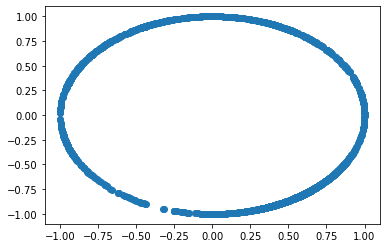

In [13]:
plt.scatter(X_normalized.iloc[:,0],X_normalized.iloc[:,1],cmap='Paired')

In [14]:
#creating a numpy array with numbers at equal space still
space = np.arange(len(X_normalized))

In [15]:
#storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

In [16]:
#storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]

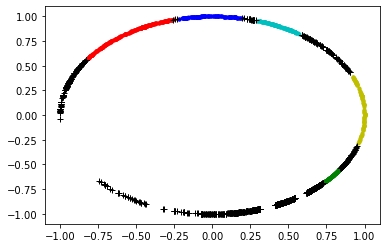

In [17]:
colors=['c.','b.','r.','y.','g.']
for Class, colour in zip(range(0,5),colors):
    Xk = X_normalized[optics_model.labels_==Class]
    plt.plot(Xk.iloc[:,0],Xk.iloc[:,1],colour)
    
plt.plot(X_normalized.iloc[optics_model.labels_==-1,0],
         X_normalized.iloc[optics_model.labels_==-1,1],'k+')

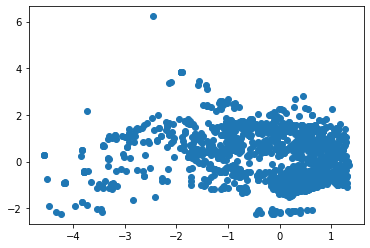

In [19]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],cmap='Paired')